In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [3]:
df = pd.read_csv('ToyotaCorolla.csv', encoding = 'Latin')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
df1=pd.DataFrame({"Price":df.Price, "Age":df.Age_08_04, "KM": df.KM, "HP":df.HP, 
                  "CC":df.cc, "Doors":df.Doors, "Gears":df.Gears, "Quarterly_Tax":df.Quarterly_Tax, "Weight":df.Weight})

In [6]:
df1.head()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
df1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<AxesSubplot:>

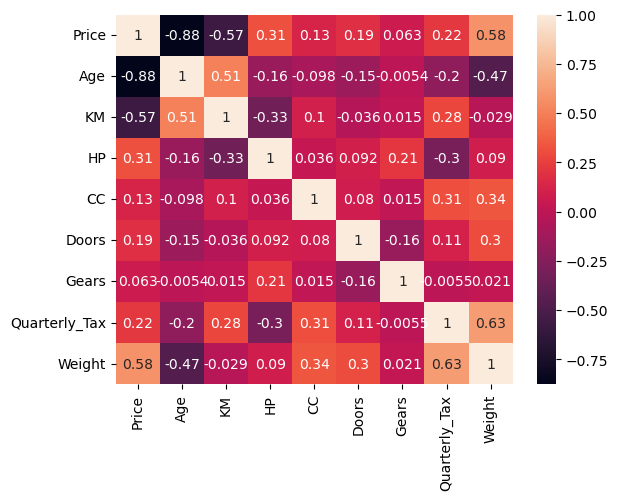

In [9]:
sns.heatmap(df1.corr(), annot = True)

In [11]:
df1[df1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [13]:
df1 = df1.drop_duplicates().reset_index(drop = True)
df1.head()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age            1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   CC             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


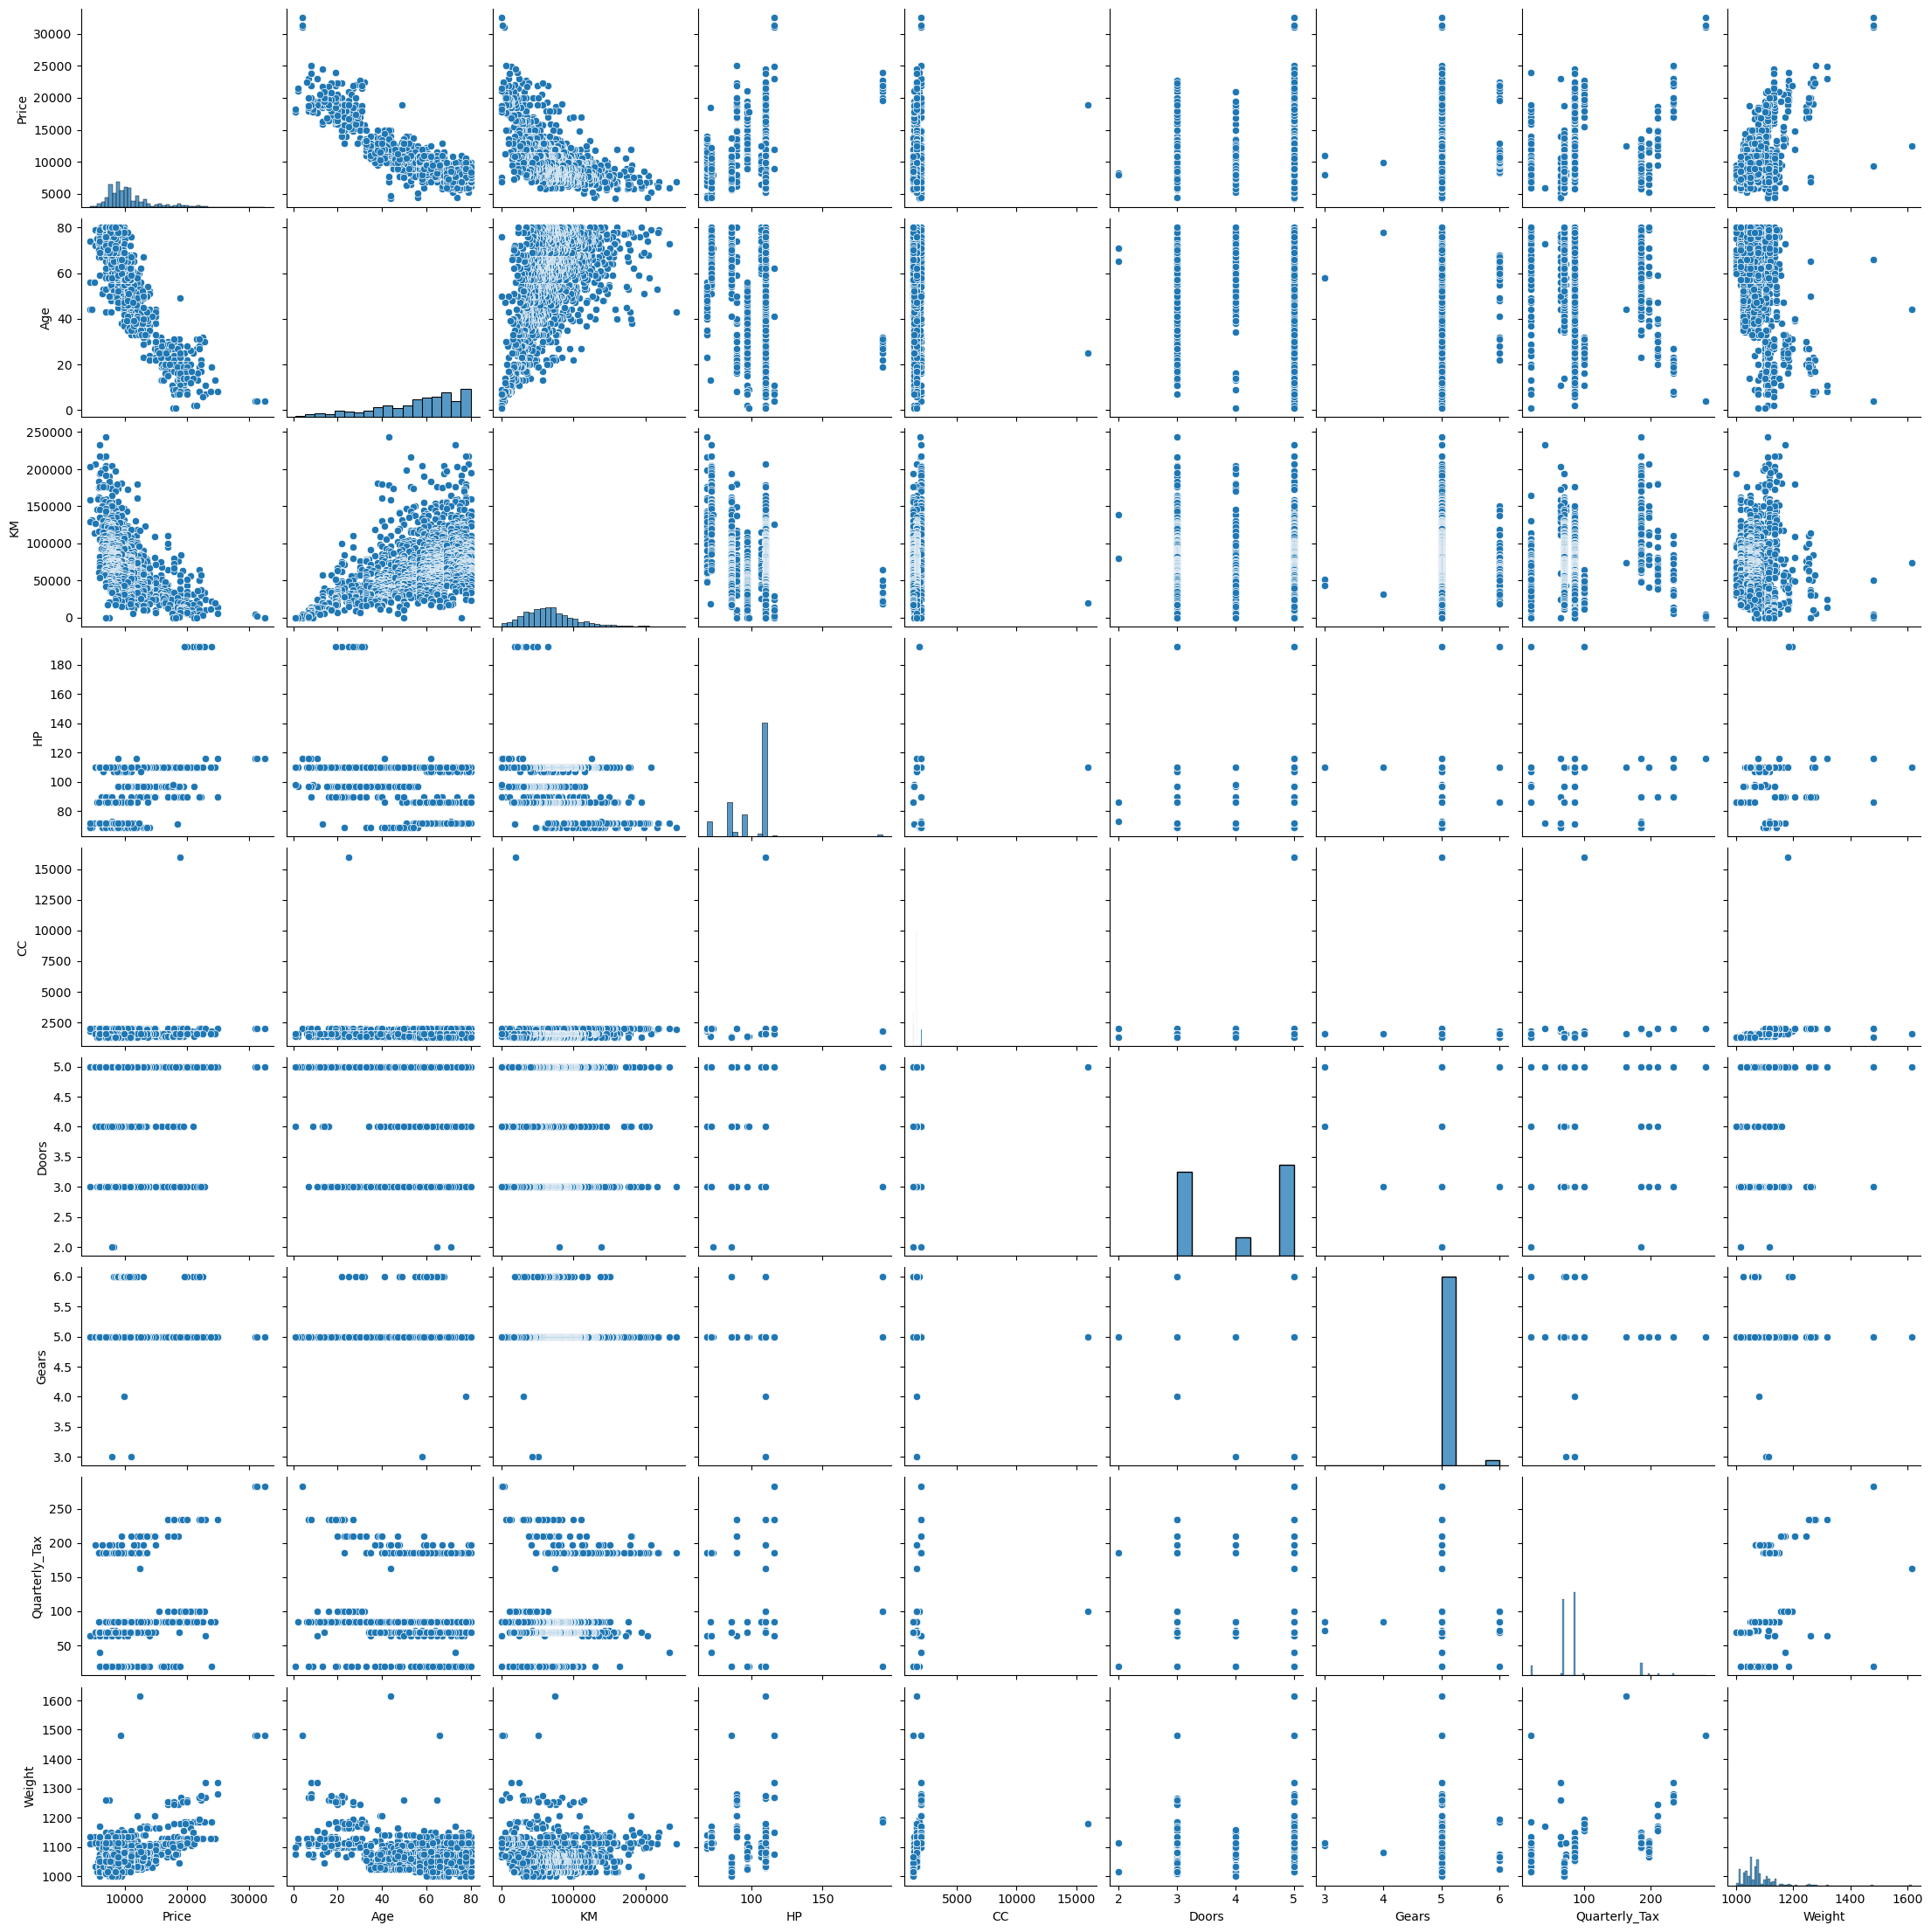

In [15]:
sns.pairplot(df1)

In [16]:
model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight", data=df1).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 03 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:24:17   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age            -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
CC               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking VIF index for non-colinearity

In [18]:
age_rsq=smf.ols("Age~KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight", data=df1).fit().rsquared
vif_age=1/(1-age_rsq)

km_rsq=smf.ols("KM~Age+HP+CC+Doors+Gears+Quarterly_Tax+Weight", data=df1).fit().rsquared
vif_km=1/(1-km_rsq)

hp_rsq=smf.ols("HP~Age+KM+CC+Doors+Gears+Quarterly_Tax+Weight", data=df1).fit().rsquared
vif_hp=1/(1-hp_rsq)

CC_rsq=smf.ols("CC~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight", data=df1).fit().rsquared
vif_CC=1/(1-CC_rsq)

Doors_rsq=smf.ols("Doors~Age+KM+HP+CC+Gears+Quarterly_Tax+Weight", data=df1).fit().rsquared
vif_Doors=1/(1-Doors_rsq)

Gears_rsq=smf.ols("Gears~Age+KM+HP+CC+Doors+Quarterly_Tax+Weight", data=df1).fit().rsquared
vif_Gears=1/(1-Gears_rsq)

Quarterly_Tax_rsq=smf.ols("Quarterly_Tax~Age+KM+HP+CC+Doors+Gears+Weight", data=df1).fit().rsquared
vif_Quarterly_Tax=1/(1-Quarterly_Tax_rsq)


Weight_rsq=smf.ols("Weight~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax", data=df1).fit().rsquared
vif_Weight=1/(1-Weight_rsq)

In [19]:
vif=pd.DataFrame({"features":["Age", "KM", "HP", "CC", "Doors", "Gears","Quarterly_Tax", "weight"],
                  "VIF":[vif_age,vif_km,vif_hp,vif_CC,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]})

In [20]:
vif

,features,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,weight,2.487180


##### As all values are less than 3 , no poroblem with colinearity

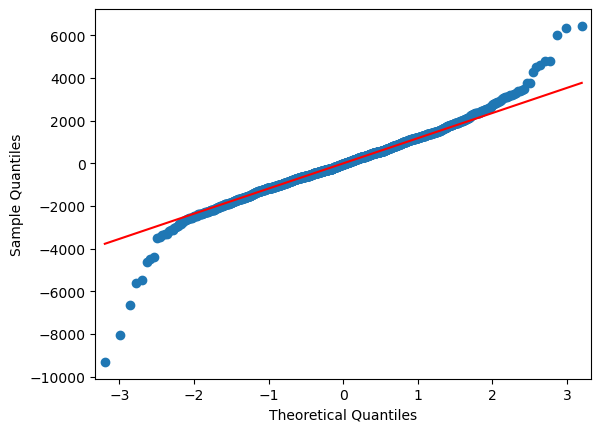

In [21]:
# Plotting residuels

sm.qqplot(model.resid, line="q")
plt.show()

In [22]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [23]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [24]:
# Cooks distance

c,a= model.get_influence().cooks_distance

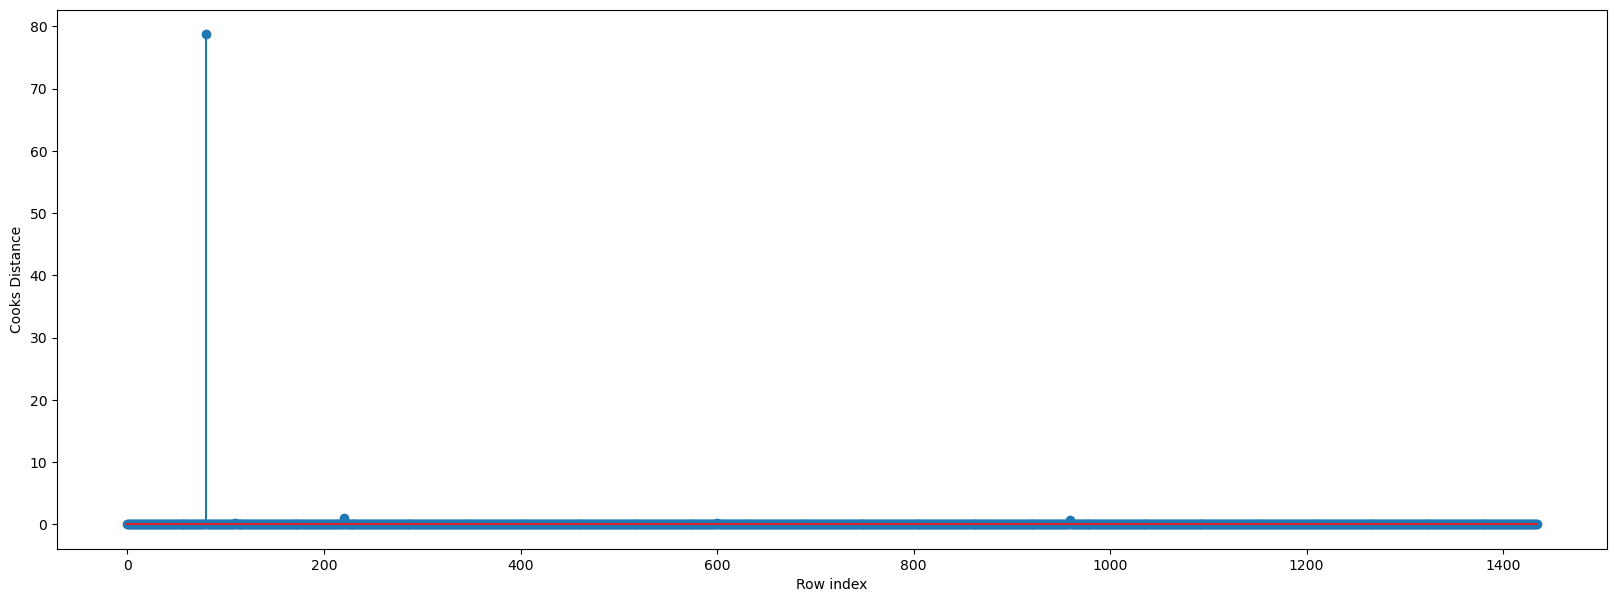

In [25]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")
plt.show()

In [26]:
np.argmax(c), np.max(c)

(80, 78.7295058224916)

In [27]:
from statsmodels.graphics.regressionplots import influence_plot

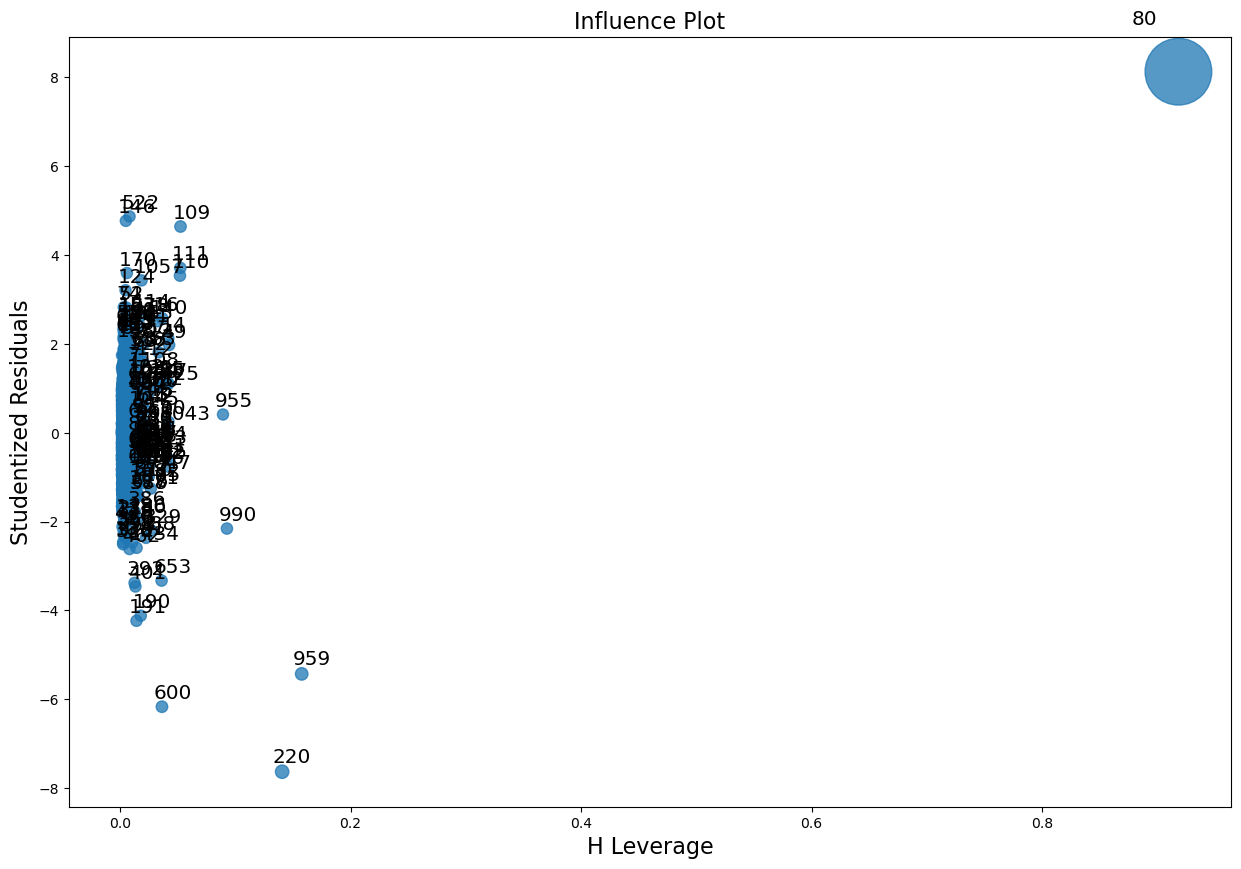

In [28]:
fig,ax=plt.subplots(figsize=(15,10))
fig=influence_plot(model, ax=ax)
plt.show()

In [29]:
 #Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
    
k=df1.shape[1]
n=df1.shape[0]
cut_off = (3*(k+1))/n
cut_off

0.020905923344947737

In [30]:
#From the above plot, it is evident that points beyond leverage cutoff value=0.020905 are the outliers

df1[df1.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [31]:
df1=df1.drop(df.index[[80]]).reset_index(drop=True)

In [32]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight",data=df1).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df1=df1.drop(df1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df1
    else:
        final_model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight",data=df1).fit()
        final_model.rsquared , final_model.aic
print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9003762532318559


In [33]:
final_model.predict(df1)

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64